In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from matplotlib import rc
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import MaxNLocator
import scipy.signal
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [2]:
datapath = '/mnt/ssd/workspace/stability/MLstability/training_data/'
dset = 'random/'
features = 'orbsummaryfeaturesxgbNorbits10000.0Nout1000window10/'
dataset = pd.read_csv(datapath+dset+features+'trainingdata.csv', index_col = 0)
print(dataset.columns.values)

['t_final_short' 'avg_beta12' 'std_beta12' 'min_beta12' 'max_beta12'
 'avg_beta23' 'std_beta23' 'min_beta23' 'max_beta23' 'avg_a1' 'std_a1'
 'max_a1' 'min_a1' 'norm_std_a1' 'norm_max_a1' 'norm_std_window10_a1'
 'norm_max_window10_a1' 'avg_e1' 'std_e1' 'max_e1' 'min_e1' 'norm_std_e1'
 'norm_max_e1' 'norm_std_window10_e1' 'norm_max_window10_e1' 'avg_inc1'
 'std_inc1' 'max_inc1' 'min_inc1' 'norm_std_inc1' 'norm_max_inc1'
 'norm_std_window10_inc1' 'norm_max_window10_inc1' 'avg_eH1' 'std_eH1'
 'max_eH1' 'min_eH1' 'avg_iH1' 'std_iH1' 'max_iH1' 'min_iH1' 'avg_ecross1'
 'std_ecross1' 'max_ecross1' 'min_ecross1' 'norm_a1_slope' 'avg_a2'
 'std_a2' 'max_a2' 'min_a2' 'norm_std_a2' 'norm_max_a2'
 'norm_std_window10_a2' 'norm_max_window10_a2' 'avg_e2' 'std_e2' 'max_e2'
 'min_e2' 'norm_std_e2' 'norm_max_e2' 'norm_std_window10_e2'
 'norm_max_window10_e2' 'avg_inc2' 'std_inc2' 'max_inc2' 'min_inc2'
 'norm_std_inc2' 'norm_max_inc2' 'norm_std_window10_inc2'
 'norm_max_window10_inc2' 'avg_eH2' 'std_eH2' '

In [3]:
labels = pd.read_csv(datapath+dset+features+'labels.csv', index_col=0)
labels.tail()

,runstring,instability_time,shadow_instability_time,Stable
24995,0024995.bin,1.843086e+04,5.927632e+04,False
24996,0024996.bin,1.868259e+03,2.336571e+03,False
24997,0024997.bin,6.939732e+04,1.870889e+04,False
24998,0024998.bin,3.230628e+04,2.883785e+04,False
24999,0024999.bin,1.000024e+09,1.000024e+09,True


In [4]:
features = []
features += ['avg_iH1', 'avg_iH2']
features += ['norm_std_a1', 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1']
features += ['norm_std_a2', 'norm_max_a2', 'norm_std_window10_a2', 'norm_max_window10_a2']
features += ['norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3']
features += ['avg_ecross1', 'std_ecross1', 'max_ecross1', 'min_ecross1']
features += ['avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2']
features += ['avg_ecross3', 'std_ecross3', 'max_ecross3', 'min_ecross3']
features += ['norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope']
features += ['avg_beta12','std_beta12','min_beta12','max_beta12','avg_beta23','std_beta23','min_beta23','max_beta23'] 
y = labels['Stable']
X = dataset[features]
X.head()

,avg_iH1,avg_iH2,norm_std_a1,norm_max_a1,norm_std_window10_a1,norm_max_window10_a1,norm_std_a2,norm_max_a2,norm_std_window10_a2,norm_max_window10_a2,...,norm_a2_slope,norm_a3_slope,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,max_beta23
0,0.396181,0.478983,0.000385,0.001217,0.000368,0.000617,0.000827,0.002327,0.000810,0.001389,...,-1.370529e-12,7.153530e-12,8.483687,0.056762,8.317693,8.557411,15.793822,0.092564,15.573864,16.067016
1,1.047261,0.837314,0.000617,0.002269,0.000261,0.000739,0.000198,0.000387,0.000247,0.000332,...,8.009972e-13,-1.378565e-12,8.415867,0.034972,8.302231,8.534979,15.313549,0.036618,15.246089,15.372485
2,0.439385,0.490559,0.001941,0.004587,0.001504,0.002501,0.002291,0.004981,0.001832,0.003063,...,-4.224861e-12,9.052250e-13,3.570380,0.131639,3.273783,3.776337,25.109709,0.137757,24.892952,25.409039
3,0.435169,0.557506,0.000025,0.000116,0.000026,0.000075,0.000015,0.000039,0.000009,0.000017,...,-5.223709e-14,2.302459e-13,18.513765,0.003294,18.500432,18.520812,19.142522,0.007732,19.124105,19.157782
4,4.005453,18.837291,0.027318,0.058350,0.000307,0.000701,0.023827,0.171873,0.001276,0.002416,...,8.542728e-10,-2.743625e-09,26.857156,6.388857,3.957209,39.824842,-20.481073,3.361663,-21.748945,4.156005


In [5]:
X.shape

(25000, 37)

In [6]:
Nrows = int(0.8*X.shape[0])
trainX = X.iloc[:Nrows, :]
trainY = y.iloc[:Nrows]
testX = X.iloc[Nrows:, :]
testY = y.iloc[Nrows:]
xgbc = XGBClassifier(seed = 0)

In [7]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [8]:
space ={
        'max_depth': hp.randint('x_max_depth',  20),
        'min_child_weight': hp.quniform ('x_min_child', 1, 10, 1),
        'subsample': hp.uniform ('x_subsample', 0.8, 1),
        'scale_pos_weight': hp.uniform("x_pos_weight", 1, 15),
        "learning_rate":hp.uniform("x_learning_rate",0.01,0.2),
        'colsample_bytree': hp.uniform ('x_tree_colsample', 0.5,1),
}

dtrain = xgb.DMatrix(trainX, trainY)
dtest = xgb.DMatrix(testX, testY)
def objective(space):

    clf = XGBClassifier(n_estimators = 100, 
                            max_depth = space['max_depth'], 
                            min_child_weight =space['min_child_weight'],
                            subsample = space['subsample'],
                            colsample_bytree =space['colsample_bytree'],
                            learning_rate = space['learning_rate'], seed = 0)
    
    params = clf.get_xgb_params()
    #dtest
    score = xgb.cv(params, dtrain, nfold = 5, metrics = "auc", early_stopping_rounds=10)
    #print score
    #score = cross_val_score(clf, trainX, trainY, cv = 5, scoring="average_precision")
    avg_score =  np.mean(score["test-auc-mean"])
    error = np.mean(score["test-auc-std"])
    
    bst = xgb.train(params, dtrain)
    preds = bst.predict(dtest)
    test_score = metrics.roc_auc_score(testY, preds)
    
    print("SCORE:", avg_score, "ERROR", error, "HOLDOUT SCORE", test_score)

    return{'loss':1-test_score, 'status': STATUS_OK, "cv_score":avg_score , "cv_error":error, "holdout":test_score }

/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [9]:
%%time
trials = Trials()
import time
start = time.time()
best = fmin(fn=objective, space = space, algo = tpe.suggest, max_evals = 50, trials = trials)
end = time.time()
print("Optimization Time: %f seconds", (end  -start))

SCORE:                                              
0.9717377599999999                                  
ERROR                                               
0.0012384579052561215                               
HOLDOUT SCORE                                       
0.9804070482783374                                  
SCORE:                                                                         
0.97112698                                                                     
ERROR                                                                          
0.002975425409186083                                                           
HOLDOUT SCORE                                                                  
0.9772890224075278                                                             
SCORE:                                                                         
0.96529644                                                                     
ERROR                                     

ERROR                                                                           
0.0018730231114172159                                                           
HOLDOUT SCORE                                                                   
0.9808256950063495                                                              
SCORE:                                                                          
0.9723908600000002                                                              
ERROR                                                                           
0.002373605177711642                                                            
HOLDOUT SCORE                                                                   
0.9800594466624631                                                              
SCORE:                                                                          
0.9180027599999999                                                              
ERROR                       

0.9735817000000001                                                              
ERROR                                                                           
0.003214079718049475                                                            
HOLDOUT SCORE                                                                   
0.9807565768253192                                                              
SCORE:                                                                          
0.9659275199999999                                                              
ERROR                                                                           
0.001489546176867578                                                            
HOLDOUT SCORE                                                                   
0.9759909410779656                                                              
SCORE:                                                                          
0.9730691800000001          

In [10]:
#fit the smaller rage 
#{'x_learning_rate': 0.07419653015127085,
# 'x_max_depth': 8,
# 'x_min_child': 4.0,
# 'x_pos_weight': 8.889472764333366,
# 'x_subsample': 0.9380315392096068,
# 'x_tree_colsample': 0.734517699234413}

#{'x_learning_rate': 0.19890696372714528,
# 'x_max_depth': 17,
# 'x_min_child': 8.0,
# 'x_pos_weight': 12.505309968632893,
# 'x_subsample': 0.9409498631912948,
# 'x_tree_colsample': 0.7528946858805113}

best

{'x_learning_rate': 0.18530222895306664,
 'x_max_depth': 17,
 'x_min_child': 9.0,
 'x_pos_weight': 8.250064151465052,
 'x_subsample': 0.9991828619585824,
 'x_tree_colsample': 0.6412682704857056}

In [11]:
best_xgbc = XGBClassifier(n_estimators=100, scale_pos_weight=best["x_pos_weight"],
                         learning_rate = best["x_learning_rate"], 
                         max_depth = int(best["x_max_depth"]), 
                         min_child_weight = best["x_min_child"],
                         subsample = best["x_subsample"], 
                         colsample_bytree = best["x_tree_colsample"])
params = best_xgbc.get_xgb_params()
score = xgb.cv(params, dtrain, nfold = 5, metrics = "auc", verbose_eval=True)
print(score)
d_Train = xgb.DMatrix(trainX, trainY)
d_Test = xgb.DMatrix(testX)
bst = xgb.train(params, d_Train)
preds = bst.predict(d_Test)
score = metrics.average_precision_score(testY, preds)
print(score)

[0]	train-auc:0.976066+0.000582432	test-auc:0.961235+0.00352315
[1]	train-auc:0.985167+0.00103347	test-auc:0.969679+0.00204451
[2]	train-auc:0.988875+0.000680994	test-auc:0.972103+0.00195575
[3]	train-auc:0.990817+0.000841151	test-auc:0.973863+0.00121573
[4]	train-auc:0.992365+0.00033934	test-auc:0.975287+0.00177222
[5]	train-auc:0.993298+0.000304652	test-auc:0.976077+0.00196771
[6]	train-auc:0.99406+0.00027357	test-auc:0.976937+0.00206026
[7]	train-auc:0.9948+0.000137885	test-auc:0.977612+0.00209116
[8]	train-auc:0.995306+0.000156949	test-auc:0.978224+0.00202099
[9]	train-auc:0.995731+0.00011233	test-auc:0.978611+0.00200726
   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.976066       0.000582       0.961235      0.003523
1        0.985167       0.001033       0.969679      0.002045
2        0.988875       0.000681       0.972103      0.001956
3        0.990817       0.000841       0.973863      0.001216
4        0.992365       0.000339       0.975287      0.00

/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


0.9724573053190164


In [12]:
#try testing on the holdout set with these parameters
from sklearn.metrics import roc_auc_score

    
best_xgbc = XGBClassifier(n_estimators=100, scale_pos_weight=best["x_pos_weight"],
                         learning_rate = best["x_learning_rate"], 
                         max_depth = int(best["x_max_depth"]), 
                         min_child_weight = best["x_min_child"],
                         subsample = best["x_subsample"], 
                         colsample_bytree = best["x_tree_colsample"])

best_xgbc.fit(trainX, trainY)
preds = best_xgbc.predict_proba(testX)[:,1]
auc_Score = roc_auc_score(testY,preds)
print(auc_Score)
print(metrics.average_precision_score(testY, preds))

0.9860628424177523
0.9785949986599527


In [13]:
print(best)

{'x_learning_rate': 0.18530222895306664, 'x_max_depth': 17, 'x_min_child': 9.0, 'x_pos_weight': 8.250064151465052, 'x_subsample': 0.9991828619585824, 'x_tree_colsample': 0.6412682704857056}


Text(0.5, 1.0, 'ROC curve (AUC = 0.986)')

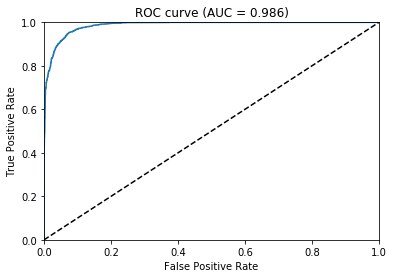

In [14]:
#the ROCAUC score is now 98.0 witht eh 2080 split compared to the 40 60 from before 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(testY, preds)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve (AUC = {0:.3f})'.format(metrics.roc_auc_score(testY, preds)))

In [15]:
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(testY, preds)
for i in range(0,len(recall), 15):
    print("Threshold {0}, recall = {1}, precision = {2}".format(thresholds[i], recall[i], precision[i]))

Threshold 0.0013525511603802443, recall = 1.0, precision = 0.6351612903225806
Threshold 0.0014198829885572195, recall = 0.9994921279837481, precision = 0.6379254457050243
Threshold 0.0014973538927733898, recall = 0.9994921279837481, precision = 0.641042345276873
Threshold 0.0015877450350672007, recall = 0.9994921279837481, precision = 0.644189852700491
Threshold 0.0017624568426981568, recall = 0.9994921279837481, precision = 0.6473684210526316
Threshold 0.0019128613639622927, recall = 0.9994921279837481, precision = 0.6505785123966942
Threshold 0.0020852270536124706, recall = 0.9994921279837481, precision = 0.6538205980066445
Threshold 0.002319666324183345, recall = 0.9994921279837481, precision = 0.6570951585976628
Threshold 0.0024068409111350775, recall = 0.9994921279837481, precision = 0.6604026845637584
Threshold 0.0025618101935833693, recall = 0.9994921279837481, precision = 0.663743676222597
Threshold 0.002783504780381918, recall = 0.9994921279837481, precision = 0.66711864406779

IndexError: index 2955 is out of bounds for axis 0 with size 2955

In [ ]:
#draw precison recall curve
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(testY, preds)
fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision Recall Curve')
print("AUC Score (Test): %f" % metrics.average_precision_score(testY, preds))
plt.show()

In [ ]:
# Histogram:
bins = 50
Stable=preds[np.where(testY==1)]
print(Stable[:5][:])
Unstable=preds[np.where(testY==0)]
print(Stable.size, Unstable.size)


fig, ax1 = plt.subplots()
n, bins, pathces = ax1.hist(Unstable, bins, alpha=0.5, label='No', color='blue', edgecolor = "black")
print(n)
ax1.set_xlabel('Predicted Probability', fontsize=14)
ax1.set_ylabel('Unstable',  fontsize=14, color='blue')
for tl in ax1.get_yticklabels():
    tl.set_color('blue')
    


ax2 = ax1.twinx()
n, bins , patches = ax2.hist(Stable, bins, alpha=0.5, label='Yes',color='green', edgecolor = "black")
print(n.astype(int))
ax2.set_ylabel('Stable', fontsize=14, color='green')
for tl in ax2.get_yticklabels():
    tl.set_color('green')
    
    
#ax1.set_ylim(ax2.get_ylim())
ax1.set_ylim([0,350]) # goes up to ~4300
ax2.set_ylim([0,350]) # goes up to ~2100

In [ ]:
# feature importances
feat_imp = pd.Series(best_xgbc.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances', figsize=(12,8))
plt.ylabel('Feature Importance Score')
plt.show()

In [ ]:
import dill
import sys
dill.dump([best_xgbc, features], open(datapath+"../models/orbsummaryfeaturesxgb_random.pkl", "wb"))